This project called Customer Segmentation part of Unsupervised Machine Learning. Data used in this peoject is transactional data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [7]:
path = "C:\\1_MS_DataScience\\Assignments\\Online Retail.xlsx"
df = pd.read_excel(path, sheet_name='OnlineRetail')

In [ ]:
df_copy = df.copy() #make the copy 

In [9]:
df_copy.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [10]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [11]:
df_copy.isna(). sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [12]:
cs = df_copy.dropna() #drop all the rows that has missing values

In [14]:
cs.loc[:, 'InvoiceDate'] = pd.to_datetime(cs['InvoiceDate']) #ensure Invoices feature has the right datatype 

In [15]:
#to check the start and end date of the dataframe
cs['InvoiceDate'].min(), cs['InvoiceDate'].max()

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:50:00'))

In [16]:
#DataPreprocessing 
cs2011 = cs[cs['InvoiceDate'].dt.year == 2011]

In [30]:
#Create a variable named Amount by multiplying Quantity with UnitPrice
cs2011['Amount'] = cs.Quantity * cs.UnitPrice

C:\Users\iqrra\AppData\Local\Temp\ipykernel_28860\3033052105.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cs2011['Amount'] = cs.Quantity * cs.UnitPrice


In [31]:
#Separate the variable InvoiceDate into two variables Date and Time.
cs2011['Date'] = cs['InvoiceDate'].dt.date
cs2011['Time'] = cs['InvoiceDate'].dt.time

C:\Users\iqrra\AppData\Local\Temp\ipykernel_28860\3890937070.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cs2011['Date'] = cs['InvoiceDate'].dt.date
C:\Users\iqrra\AppData\Local\Temp\ipykernel_28860\3890937070.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cs2011['Time'] = cs['InvoiceDate'].dt.time


In [32]:
cs2011.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Date,Time
42481,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,19.5,2011-01-04,10:00:00
42482,539993,21499,BLUE POLKADOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,10.5,2011-01-04,10:00:00
42483,539993,21498,RED RETROSPOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,10.5,2011-01-04,10:00:00
42484,539993,22379,RECYCLING BAG RETROSPOT,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom,10.5,2011-01-04,10:00:00
42485,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom,12.5,2011-01-04,10:00:00


In [51]:
#create a column Recency which counts the number of months that have passed since the invoice date
target_date = pd.Timestamp('2012-01-01')
cs2011['Recency'] = (target_date.year - cs2011['InvoiceDate'].dt.year) * 12 + (target_date.month - cs2011['InvoiceDate'].dt.month)


C:\Users\iqrra\AppData\Local\Temp\ipykernel_28860\3340346108.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cs2011['Recency'] = (target_date.year - cs2011['InvoiceDate'].dt.year) * 12 + (target_date.month - cs2011['InvoiceDate'].dt.month)


In [35]:
cs2011.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Date,Time,Recency
42481,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,19.5,2011-01-04,10:00:00,12
42482,539993,21499,BLUE POLKADOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,10.5,2011-01-04,10:00:00,12
42483,539993,21498,RED RETROSPOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,10.5,2011-01-04,10:00:00,12
42484,539993,22379,RECYCLING BAG RETROSPOT,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom,10.5,2011-01-04,10:00:00,12
42485,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom,12.5,2011-01-04,10:00:00,12


In [38]:
csgrouped= cs2011.groupby("CustomerID").agg( 
Recency=pd.NamedAgg(column="Recency", aggfunc="min"),
Frequency=pd.NamedAgg(column="InvoiceNo", aggfunc="count"),
Amount=pd.NamedAgg(column="Amount", aggfunc="sum"),
Minimum=pd.NamedAgg(column="Amount", aggfunc="min"),
Maximum=pd.NamedAgg(column="Amount", aggfunc="max"),
Mean=pd.NamedAgg(column="Amount", aggfunc="mean"),
)

In [40]:
csgrouped.describe()

,Recency,Frequency,Amount,Minimum,Maximum,Mean
count,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000
mean,3.936616,89.533223,1825.038123,-87.679019,185.231407,28.566537
std,2.986889,223.075476,7885.717927,2919.310184,2923.232144,127.779390
min,1.000000,1.000000,-4287.630000,-168469.600000,-4287.630000,-4287.630000
25%,2.000000,17.000000,290.955000,-9.950000,31.600000,11.040220
50%,3.000000,41.000000,642.485000,0.850000,51.000000,16.954425
75%,5.000000,98.000000,1563.750000,6.960000,102.000000,23.478778
max,12.000000,7692.000000,270897.140000,3861.000000,168469.600000,3861.000000


In [41]:
print("Old Shape: ", csgrouped.shape)

Old Shape:  (4244, 6)


In [ ]:
#remove the outliers 
import numpy as np
import matplotlib.pyplot as plt

def removeOutliers(data, col, show_plot=True):
    Q1 = np.quantile(data[col], 0.25)
    Q3 = np.quantile(data[col], 0.75)
    IQR = Q3 - Q1

    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR

    print(f"IQR voor {col}: {IQR:.2f} (lower: {lower_range:.2f}, upper: {upper_range:.2f})")

    # Plot histogram met grenzen
    if show_plot:
        plt.figure(figsize=(8, 4))
        plt.hist(data[col], bins=200, alpha=0.7, color='skyblue', edgecolor='black')
        plt.axvline(lower_range, color='red', linestyle='--', label='Lower Bound')
        plt.axvline(upper_range, color='red', linestyle='--', label='Upper Bound')
        plt.title(f"Histogram van '{col}' met outlier-grenzen")
        plt.xlabel(col)
        plt.ylabel("Aantal")
        plt.legend()
        plt.tight_layout()
        plt.show()

    # Verwijder outliers
    filtered_data = data[(data[col] > lower_range) & (data[col] < upper_range)]

    return filtered_data

IQR voor Frequency: 81.00 (lower: -104.50, upper: 219.50)


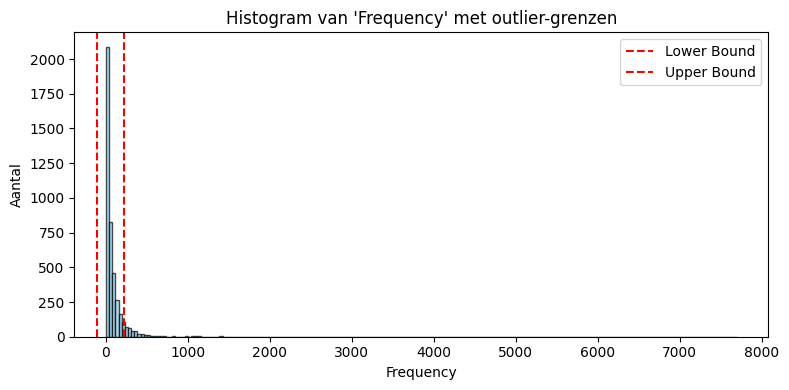

IQR voor Amount: 984.78 (lower: -1214.27, upper: 2724.83)


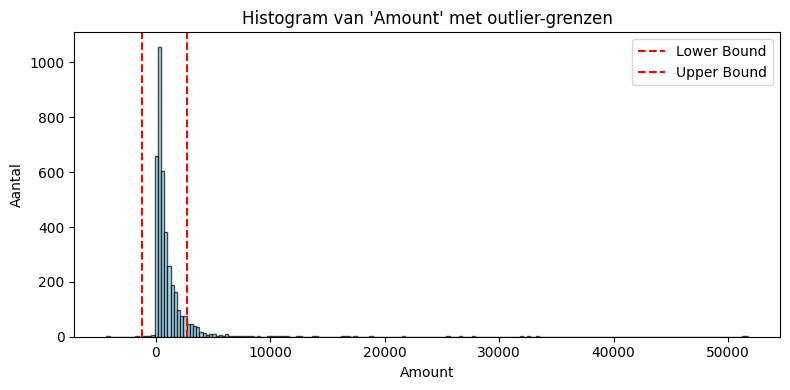

In [43]:
columns_outliers = ['Frequency', 'Amount']

for column in columns_outliers:
     csgrouped = removeOutliers(csgrouped, column)

In [44]:
print("New Shape: ", csgrouped.shape)

New Shape:  (3579, 6)


c:\1_MS_DataScience\Assignments\customerSegmentation\.venv\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1351: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


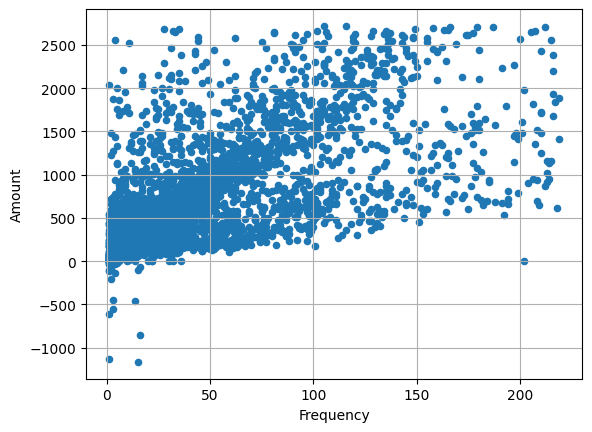

In [55]:
csgrouped.plot(kind='scatter', x='Frequency', y ='Amount', grid=True, cmap='jet', legend=True)
plt.show()

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X = csgrouped[['Frequency', 'Recency', 'Amount']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertias = []
K = range(2, 31)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

In [47]:
inertias

[6067.340124010901,
 3765.937354313079,
 3150.6257142287764,
 2826.5033769842194,
 2286.4607279441934,
 1978.5695007563554,
 1797.031319231381,
 1620.7249928198758,
 1553.9264418635917,
 1392.8180245949961,
 1326.780105393092,
 1252.922845598807,
 1208.372240057983,
 1172.4191286782675,
 1109.7536475815668,
 1073.1596130674639,
 1033.2987420465286,
 992.7772820757123,
 948.7688852536828,
 915.9513276593975,
 893.495107643786,
 867.2971465808023,
 853.3129856443707,
 814.3959909351747,
 770.834958576775,
 769.80040628128,
 750.8963925619606,
 727.5545213921376,
 717.5432423840924]

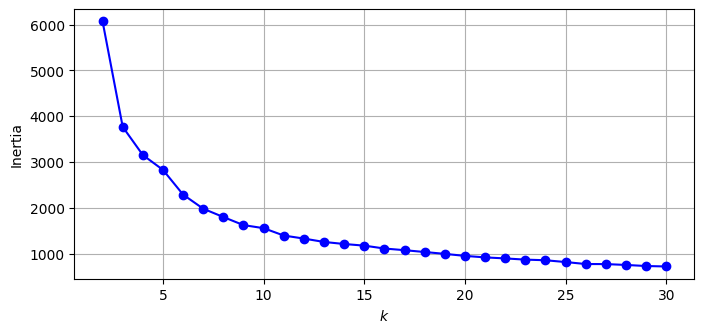

In [48]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(2, 31), inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.grid()
plt.show()

possible cluster 4,5,6 and 7

In [49]:
silhouette_scores = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

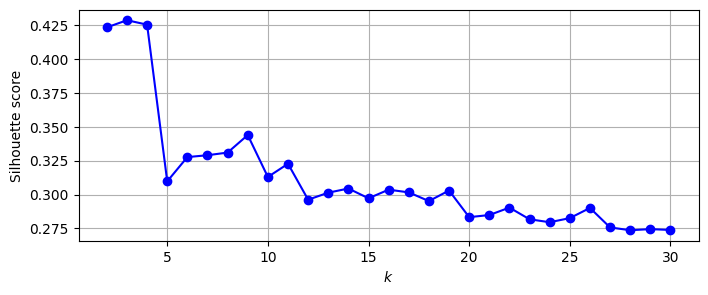

In [50]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 31), silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("Silhouette score")
plt.grid()
plt.show()